## Import Libraries

In [9]:
"""
Version here used

Python Version: 3.7.13
Pandas Version: 1.3.5
Seaborn Version: 0.11.2
RDKit Version: 2020.09.1
Operating System (OS): Windows-10-10.0.19041-SP0
Mathplotlib Version: 3.5.1
Matplotlib Venn Version: 0.11.6
Numpy Version: 1.21.5
Chemplot Version: 1.2.0
FPDF Version: 1.7.2

"""

print("Python Version: " + platform.python_version())
print("Seaborn Version: " + sns.__version__)
print("RDKit Version: " + rdBase.rdkitVersion )
print("Operating System (OS): " + platform.platform())
print("Matplotlib Version: " + matplotlib.__version__)
print("Numpy Version: " + np.__version__)

NameError: name 'platform' is not defined

## Global Variables

In [71]:
import_keyname = "SDMolSupplier_Object"
dataset_lenght_keyname = "number_of_molecules"
identifier_keyname = "identifier_list"
duplicates_keyname = "number_of_duplicates"
shared_mols_keyname = "number_of_shared_molecules"
shared_mols_id_keyname = "shared_molecules"
lipinski_list_keyname = "number_of_broken_Lipinski_Rules"
lipinski_summary_keyname = "Lipinski_Rule_of_5_summary"
mol_grid_keyname = "molecule_picture"
database_id_keyname = "coconut_id_keyname"

## Data Import

In [12]:
import CIDER

In [8]:
from CIDER import import_as_data_dict

ImportError: cannot import name 'import_as_data_dict' from 'CIDER' (C:\Users\xi59vek\.conda\envs\CDC\lib\site-packages\CIDER\__init__.py)

In [9]:
testdict = import_as_data_dict('data2')

NameError: name 'import_as_data_dict' is not defined

## Overview Dataset Size

In [10]:
from CIDER import get_number_of_molecules

ImportError: cannot import name 'get_number_of_molecules' from 'CIDER' (C:\Users\xi59vek\.conda\envs\CDC\lib\site-packages\CIDER\__init__.py)

In [5]:
get_number_of_molecules(testdict)

NameError: name 'get_number_of_molecules' is not defined

## Overview molecules (visualization of molecules)

In [5]:
from cider import draw_molecules

{'no_lipinski.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x26e8e287f70>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400 at 0x26E8E295DC8>},
 'set_chlorbenzene.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x26e8e287fb0>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400 at 0x26E8E2ED8C8>},
 'set_phenole.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x26e8e28e070>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400 at 0x26E8E2ED9C8>}}

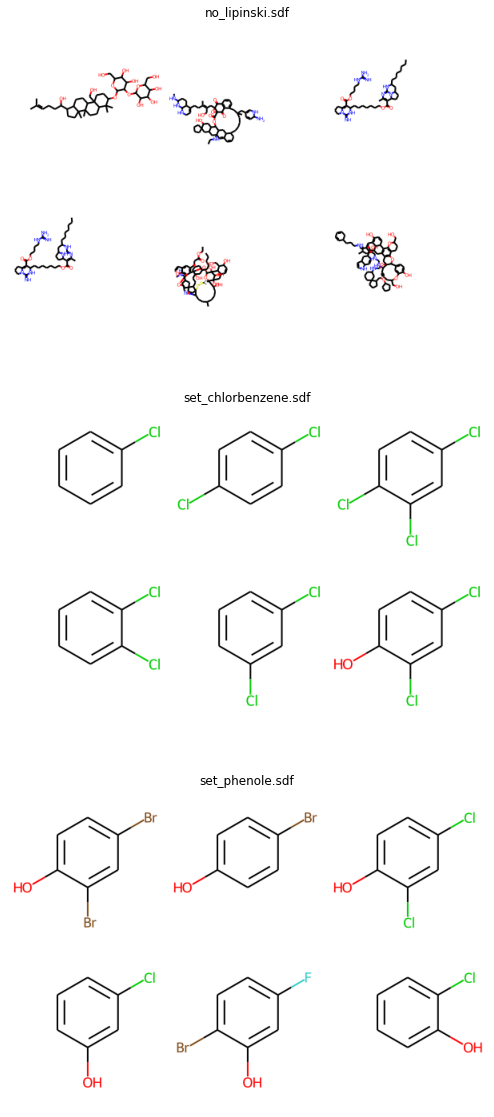

In [6]:
draw_molecules(testdict, number_of_mols = 6)

## Get  Database ID

In [7]:
from cider import get_database_id

In [8]:
get_database_id(testdict, 'coconut_id')

{'no_lipinski.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x26e8e287f70>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400 at 0x26E8E295DC8>,
  'coconut_id_keyname': ['CNP0125965',
   'CNP0436865',
   'CNP0211232',
   'CNP0436877',
   'CNP0096266',
   'CNP0153122',
   'CNP0271735',
   'CNP0097989',
   'CNP0235956',
   'CNP0152948',
   'CNP0280674',
   'CNP0059407',
   'CNP0084420',
   'CNP0073501',
   'CNP0307371',
   'CNP0436931',
   'CNP0103963',
   'CNP0436939',
   'CNP0436955',
   'CNP0051053',
   'CNP0436958',
   'CNP0436964',
   'CNP0082413',
   'CNP0063891',
   'CNP0436979',
   'CNP0437007',
   'CNP0000456',
   'CNP0437066',
   'CNP0257632',
   'CNP0081665',
   'CNP0437077',
   'CNP0426966',
   'CNP0236088',
   'CNP0058972',
   'CNP0319508',
   'CNP0437113',
   'CNP0000703',
   'CNP0066154',
   'CNP0147861',
   'CNP0052692',
   'CNP0437141',
   'CNP0212788',
   'CNP0391402',
   'CNP0144127

## Get Chemical Identifier

In [9]:
from cider import get_identifier_list_key

In [10]:
get_identifier_list_key(testdict)

{'no_lipinski.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x26e8e287f70>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400 at 0x26E8E295DC8>,
  'coconut_id_keyname': ['CNP0125965',
   'CNP0436865',
   'CNP0211232',
   'CNP0436877',
   'CNP0096266',
   'CNP0153122',
   'CNP0271735',
   'CNP0097989',
   'CNP0235956',
   'CNP0152948',
   'CNP0280674',
   'CNP0059407',
   'CNP0084420',
   'CNP0073501',
   'CNP0307371',
   'CNP0436931',
   'CNP0103963',
   'CNP0436939',
   'CNP0436955',
   'CNP0051053',
   'CNP0436958',
   'CNP0436964',
   'CNP0082413',
   'CNP0063891',
   'CNP0436979',
   'CNP0437007',
   'CNP0000456',
   'CNP0437066',
   'CNP0257632',
   'CNP0081665',
   'CNP0437077',
   'CNP0426966',
   'CNP0236088',
   'CNP0058972',
   'CNP0319508',
   'CNP0437113',
   'CNP0000703',
   'CNP0066154',
   'CNP0147861',
   'CNP0052692',
   'CNP0437141',
   'CNP0212788',
   'CNP0391402',
   'CNP0144127

## Testing for duplicates

In [11]:
from cider import get_duplicate_key

In [12]:
get_duplicate_key(testdict)

Number of duplicates in no_lipinski.sdf: 0
Number of duplicates in set_chlorbenzene.sdf: 0
Number of duplicates in set_phenole.sdf: 2


{'no_lipinski.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x26e8e287f70>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400 at 0x26E8E295DC8>,
  'coconut_id_keyname': ['CNP0125965',
   'CNP0436865',
   'CNP0211232',
   'CNP0436877',
   'CNP0096266',
   'CNP0153122',
   'CNP0271735',
   'CNP0097989',
   'CNP0235956',
   'CNP0152948',
   'CNP0280674',
   'CNP0059407',
   'CNP0084420',
   'CNP0073501',
   'CNP0307371',
   'CNP0436931',
   'CNP0103963',
   'CNP0436939',
   'CNP0436955',
   'CNP0051053',
   'CNP0436958',
   'CNP0436964',
   'CNP0082413',
   'CNP0063891',
   'CNP0436979',
   'CNP0437007',
   'CNP0000456',
   'CNP0437066',
   'CNP0257632',
   'CNP0081665',
   'CNP0437077',
   'CNP0426966',
   'CNP0236088',
   'CNP0058972',
   'CNP0319508',
   'CNP0437113',
   'CNP0000703',
   'CNP0066154',
   'CNP0147861',
   'CNP0052692',
   'CNP0437141',
   'CNP0212788',
   'CNP0391402',
   'CNP0144127

## Comparison of molecules and visualization

In [13]:
from cider import get_shared_molecules_key

In [14]:
get_shared_molecules_key(testdict)

Number of molecules that can be found in all datasets: 0


{'no_lipinski.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x26e8e287f70>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400 at 0x26E8E295DC8>,
  'coconut_id_keyname': ['CNP0125965',
   'CNP0436865',
   'CNP0211232',
   'CNP0436877',
   'CNP0096266',
   'CNP0153122',
   'CNP0271735',
   'CNP0097989',
   'CNP0235956',
   'CNP0152948',
   'CNP0280674',
   'CNP0059407',
   'CNP0084420',
   'CNP0073501',
   'CNP0307371',
   'CNP0436931',
   'CNP0103963',
   'CNP0436939',
   'CNP0436955',
   'CNP0051053',
   'CNP0436958',
   'CNP0436964',
   'CNP0082413',
   'CNP0063891',
   'CNP0436979',
   'CNP0437007',
   'CNP0000456',
   'CNP0437066',
   'CNP0257632',
   'CNP0081665',
   'CNP0437077',
   'CNP0426966',
   'CNP0236088',
   'CNP0058972',
   'CNP0319508',
   'CNP0437113',
   'CNP0000703',
   'CNP0066154',
   'CNP0147861',
   'CNP0052692',
   'CNP0437141',
   'CNP0212788',
   'CNP0391402',
   'CNP0144127

In [15]:
from cider import visualize_intersection

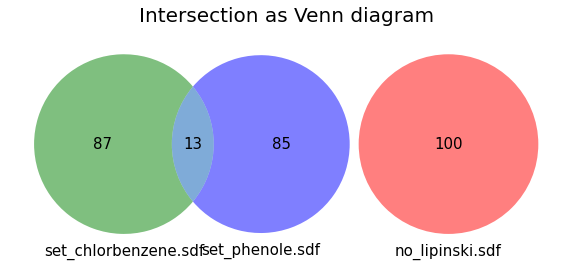

In [16]:
visualize_intersection(testdict)

## Get Descriptor

In [17]:
from cider import get_descriptor_list_key
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

In [18]:
get_descriptor_list_key(testdict, Descriptors.MolWt, 'Molecular Weight')
get_descriptor_list_key(testdict, Descriptors.MolLogP, 'LogP')
get_descriptor_list_key(testdict, rdMolDescriptors.CalcMolFormula, 'Molecular Formula')
get_descriptor_list_key(testdict, Descriptors.NumHDonors, 'Number of H-Donors')
get_descriptor_list_key(testdict, Descriptors.RingCount, 'Number of Rings')
get_descriptor_list_key(testdict, Descriptors.NumHAcceptors, 'Number of H-Acceptors')
get_descriptor_list_key(testdict, Descriptors.Chi1, 'Chi Connectivity Indices')
get_descriptor_list_key(testdict, Descriptors.Kappa1, 'Kappa Shape Indices')
testdict['set_phenole.sdf'].keys()

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'molecule_picture', 'coconut_id_keyname', 'identifier_list', 'number_of_duplicates', 'number_of_shared_molecules', 'shared_molecules', 'Molecular Weight', 'LogP', 'Molecular Formula', 'Number of H-Donors', 'Number of Rings', 'Number of H-Acceptors', 'Chi Connectivity Indices', 'Kappa Shape Indices'])

## Get descriptor value with database ID

In [19]:
from cider import get_value_from_id

In [20]:
get_value_from_id(testdict, 'CNP0291002', 'LogP')

Molecule not found in no_lipinski.sdf
Molecule found in set_chlorbenzene.sdf
LogP value for ID CNP0291002: 1.9537999999999995
Molecule found in set_phenole.sdf
LogP value for ID CNP0291002: 1.9537999999999995


## Descriptor binning and visualization

In [23]:
from cider import get_discrete_descriptor_counts
# from cider import get_continuous_descriptor_counts
# from cider import discrete_descriptor_plot
# from cider import continuous_descriptor_plot
# from cider import descriptor_counts_and_plot

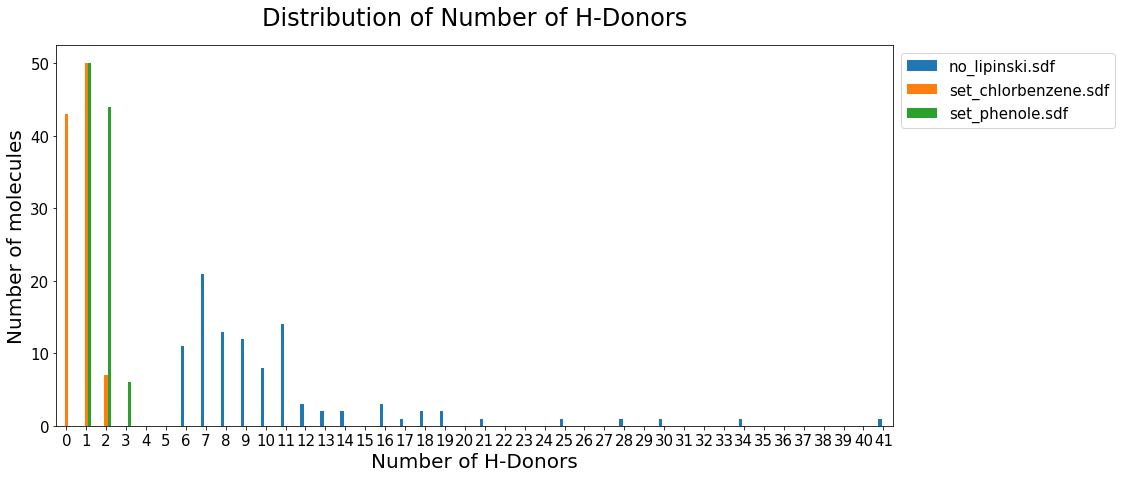

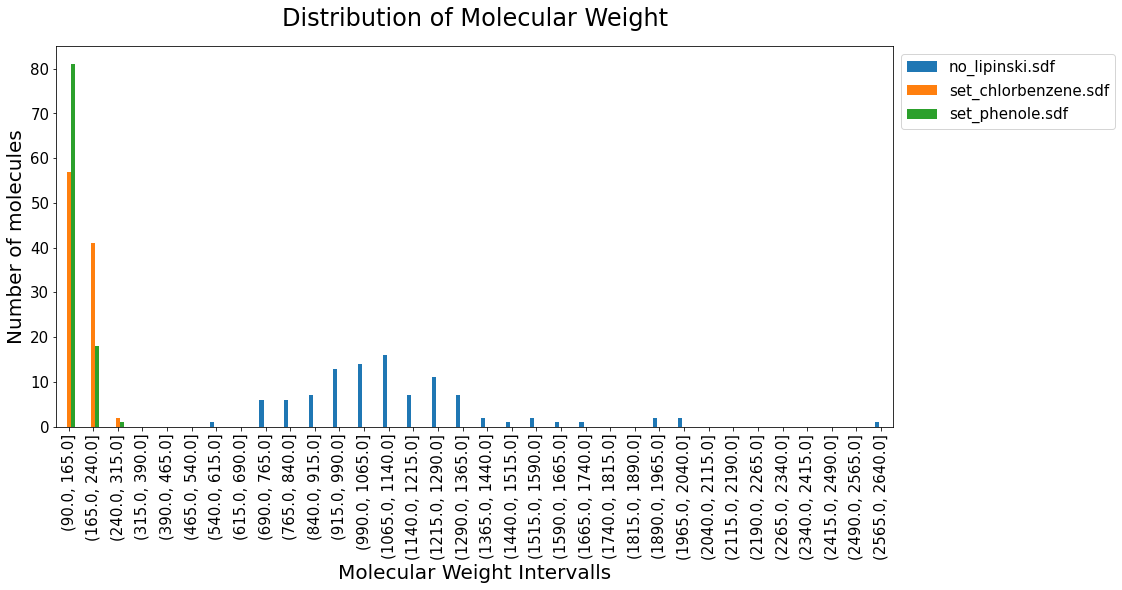

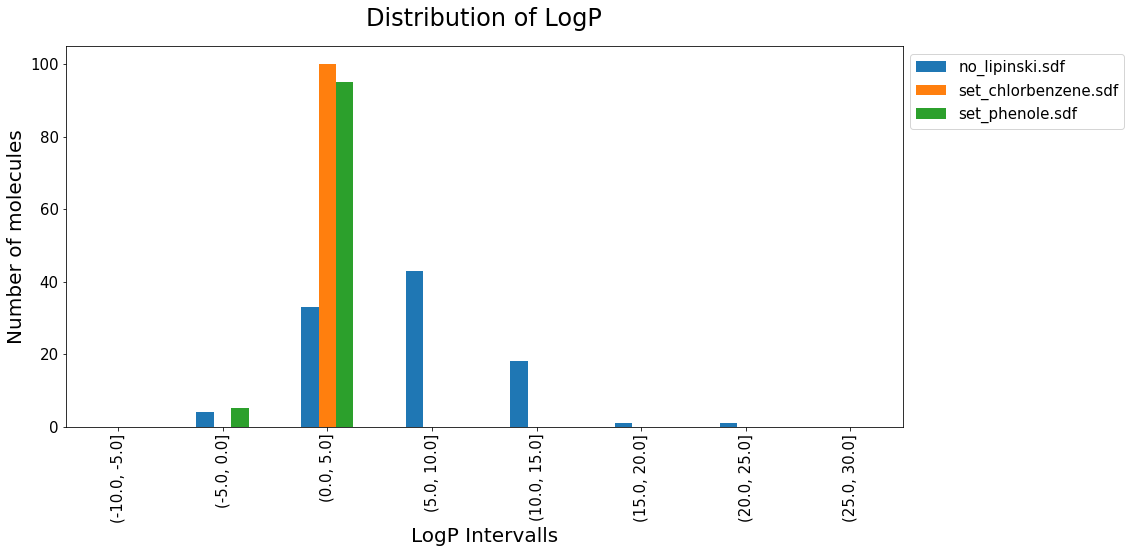

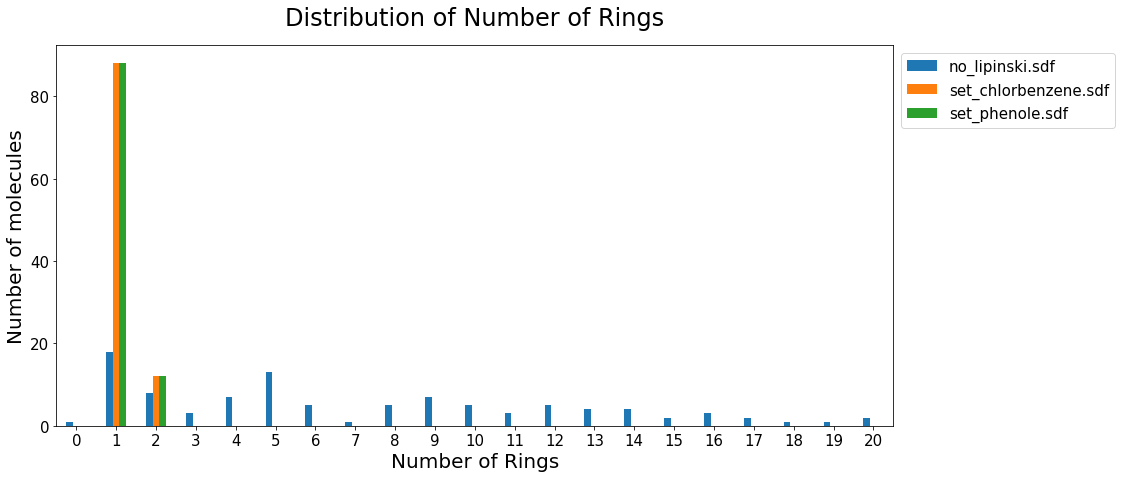

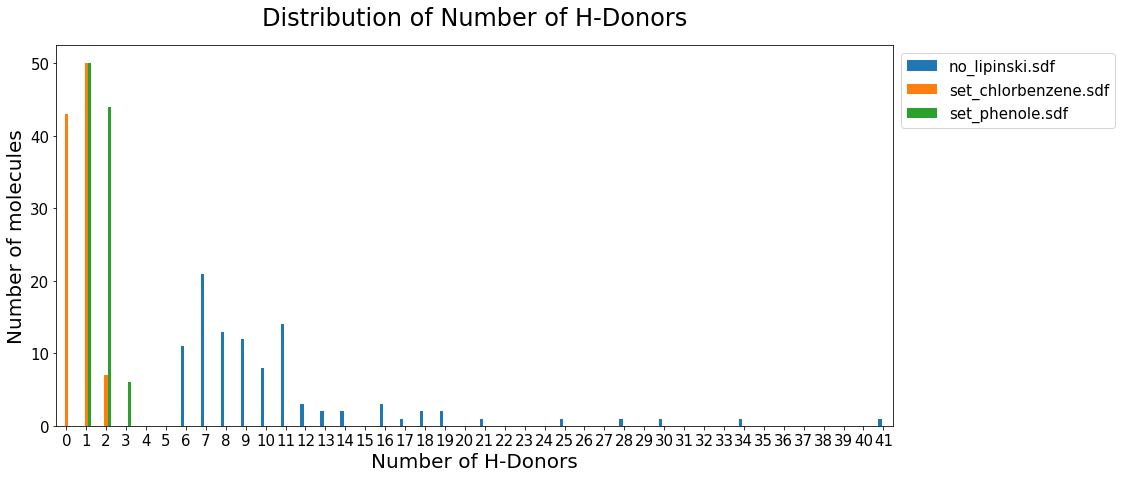

In [24]:
descriptor_counts_and_plot(testdict, 'Molecular Weight', 75)
descriptor_counts_and_plot(testdict, 'LogP', 5)
descriptor_counts_and_plot(testdict, 'Number of Rings')
descriptor_counts_and_plot(testdict, 'Number of H-Donors')

## Lipinski Rule of 5 with visualization

In [41]:
from cider import get_lipinski_key
from cider import lipinski_plot

In [40]:
get_lipinski_key(testdict)

{'no_lipinski.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x141b7edf5b0>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400 at 0x141B802D8C8>,
  'coconut_id_keyname': ['CNP0125965',
   'CNP0436865',
   'CNP0211232',
   'CNP0436877',
   'CNP0096266',
   'CNP0153122',
   'CNP0271735',
   'CNP0097989',
   'CNP0235956',
   'CNP0152948',
   'CNP0280674',
   'CNP0059407',
   'CNP0084420',
   'CNP0073501',
   'CNP0307371',
   'CNP0436931',
   'CNP0103963',
   'CNP0436939',
   'CNP0436955',
   'CNP0051053',
   'CNP0436958',
   'CNP0436964',
   'CNP0082413',
   'CNP0063891',
   'CNP0436979',
   'CNP0437007',
   'CNP0000456',
   'CNP0437066',
   'CNP0257632',
   'CNP0081665',
   'CNP0437077',
   'CNP0426966',
   'CNP0236088',
   'CNP0058972',
   'CNP0319508',
   'CNP0437113',
   'CNP0000703',
   'CNP0066154',
   'CNP0147861',
   'CNP0052692',
   'CNP0437141',
   'CNP0212788',
   'CNP0391402',
   'CNP0144127

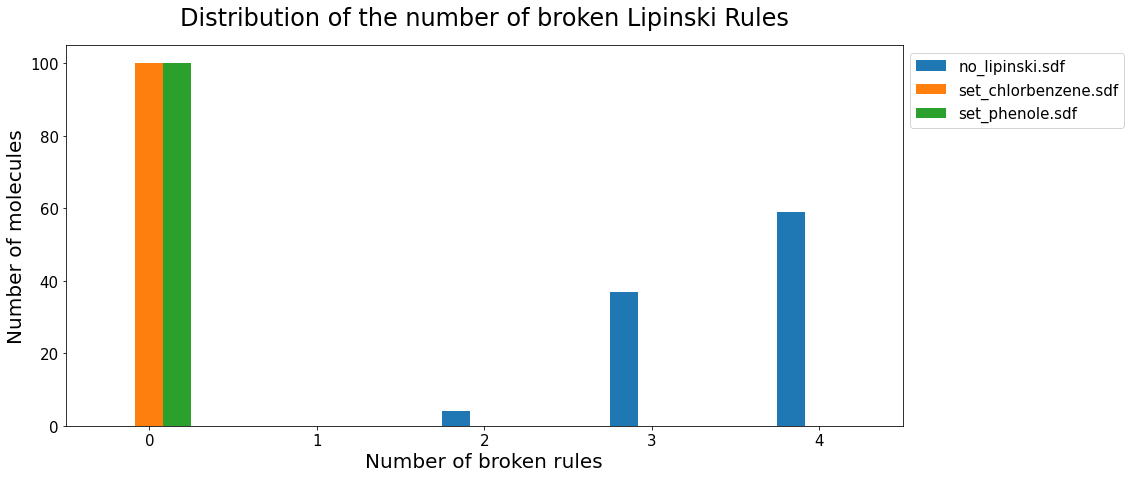

In [42]:
lp = lipinski_plot(testdict)

## Chemical Space Visualization

In [43]:
from cider import chemical_space_visualization

C:\Users\Hannah\anaconda3\envs\new_env\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Hannah\anaconda3\envs\new_env\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


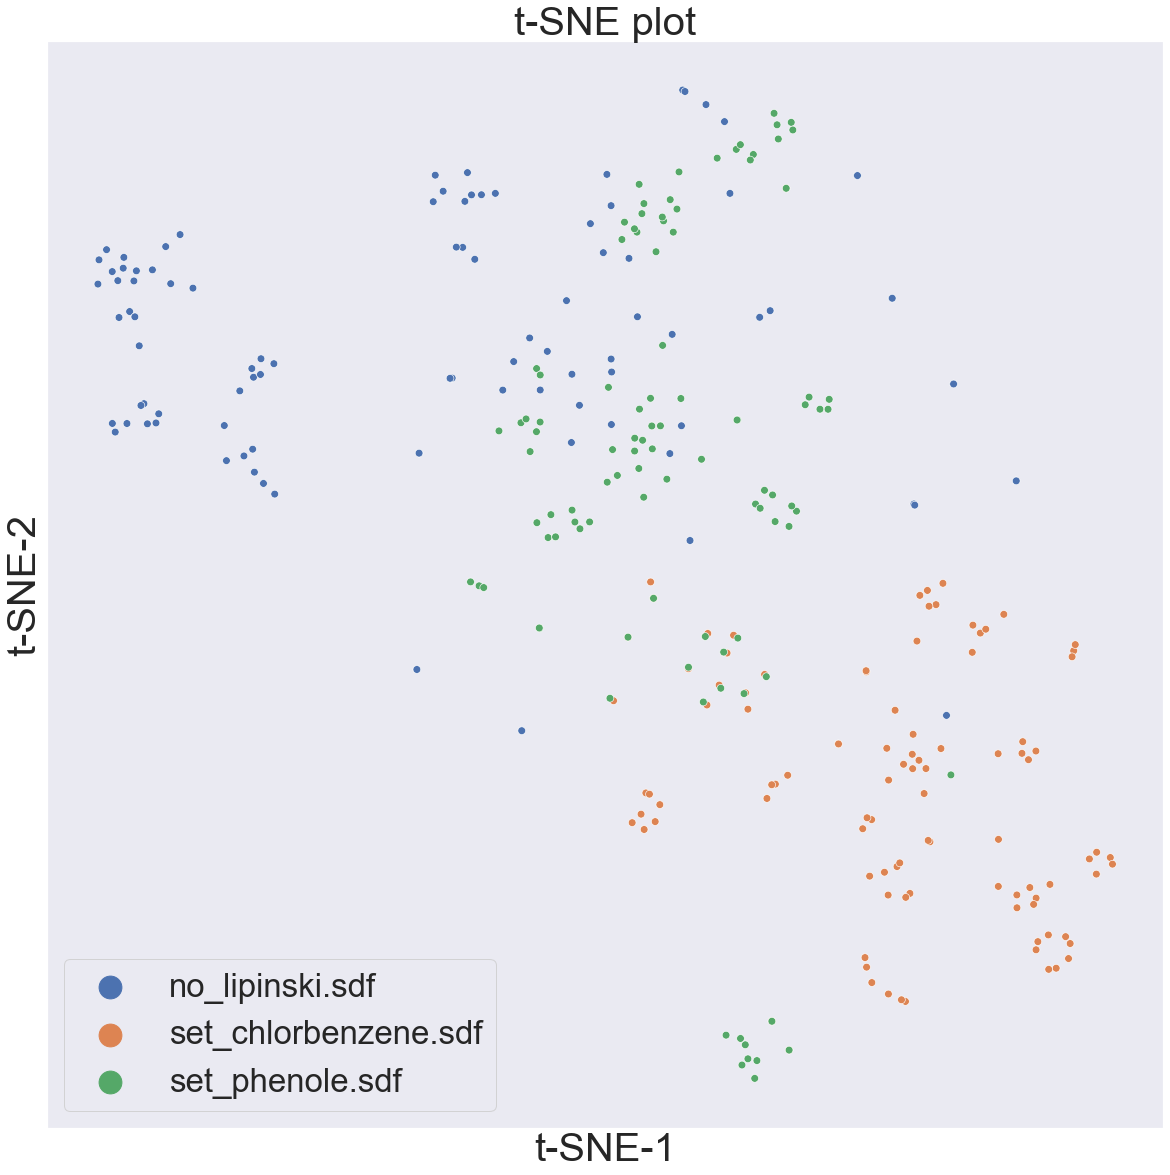

In [44]:
chemical_space_visualization(testdict, fp_bits = 1024, dimension_reduction = 'tsne', interactive = False)

## Export

In [47]:
from cider import export_single_dict_values
from cider import export_all_picture_pdf

In [48]:
export_single_dict_values(testdict)      
export_all_picture_pdf()

no_lipinski.sdf : 11 exported descriptor values
set_chlorbenzene.sdf : 11 exported descriptor values
set_phenole.sdf : 11 exported descriptor values
